#Production Database for OSU Hardware Testing Tutorial
This Tutorial walks you through the ITk database workflow for the OSU Hardware Development Lab. Currently, these scripts are ran throught the terminal but are being adapted to a UI interface.



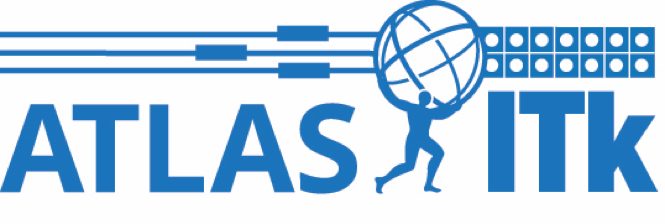

---

These scripts are stored in the HDL GitHub: [hardware_testing](https://github.com/OSU-HEP-HDL/hardware_testing)



The production database can be found here: [ITk Database](https://itkpd-test.unicorncollege.cz/)

Documentation of the API: [CERN Docs](https://itkdb.docs.cern.ch/)

GitLab: [itkdb](https://gitlab.cern.ch/atlas-itk/sw/db/itkdb)

**In order to run these scripts, you require a registered account with usable access codes.**

These scripts will register these components to the OSU local database simultaneously, but for the sake of the tutorial, they will not be registered locally.

---

First, let's clone the tutorial git repo!

In [ ]:
!git clone https://github.com/Jacobecrosby/hardware_database_tutorial.git
%cd hardware_database_tutorial/

##Package Installation
First, we must install the required packages to run these scripts!

**You'll be asked to restart the session after installation to update some packages, just hit cancel**


In [ ]:
pip install -r requirements/requirements.txt

##Save Login Info
The login information is saved in a file called `.env`. Here, we export all the necessary login information into that file. This tutorial uses the account `Test User` under the Okalahoma State University ID.

In [ ]:
!echo "ITKDB_ACCESS_CODE1=4057445797" >> .env
!echo "ITKDB_ACCESS_CODE2=4057445796" >> .env
!echo "ITKDB_ACCESS_SCOPE=openid https://itkpd-test.unicorncollege.cz" >> .env
!echo "ITKDB_ACCESS_AUDIENCE=https://itkpd-test.unicorncollege.cz" >> .env
!echo "ITKDB_AUTH_URL=https://uuidentity.plus4u.net/uu-oidc-maing02/bb977a99f4cc4c37a2afce3fd599d0a7/oidc/" >> .env
!echo "ITKDB_API_URL=https://itkpd-test.unicorncollege.cz/" >> .env
!echo "ITKDB_CASSETTE_LIBRARY_DIR=tests/integration/cassettes" >> .env

##Registering Components
Now that all the login information has been saved, we can start registering components. To register a component, run the line below.

This script can register a single component or a batch of components. It wll run you through a series of questions in order to generate the proper ATLAS serial number(s) for the component(s).

When the script is ran, move your curser to the output `Input Selection: ` in order to type your input.

When prompted, press `9` for Dummy.


In [ ]:
!python register_components.py

Once the registering script is ran successfully, you can see it on production database under `My Component List` if you login onto the site. The link is supplied above.

As you can see, the component is registered at the reception stage.

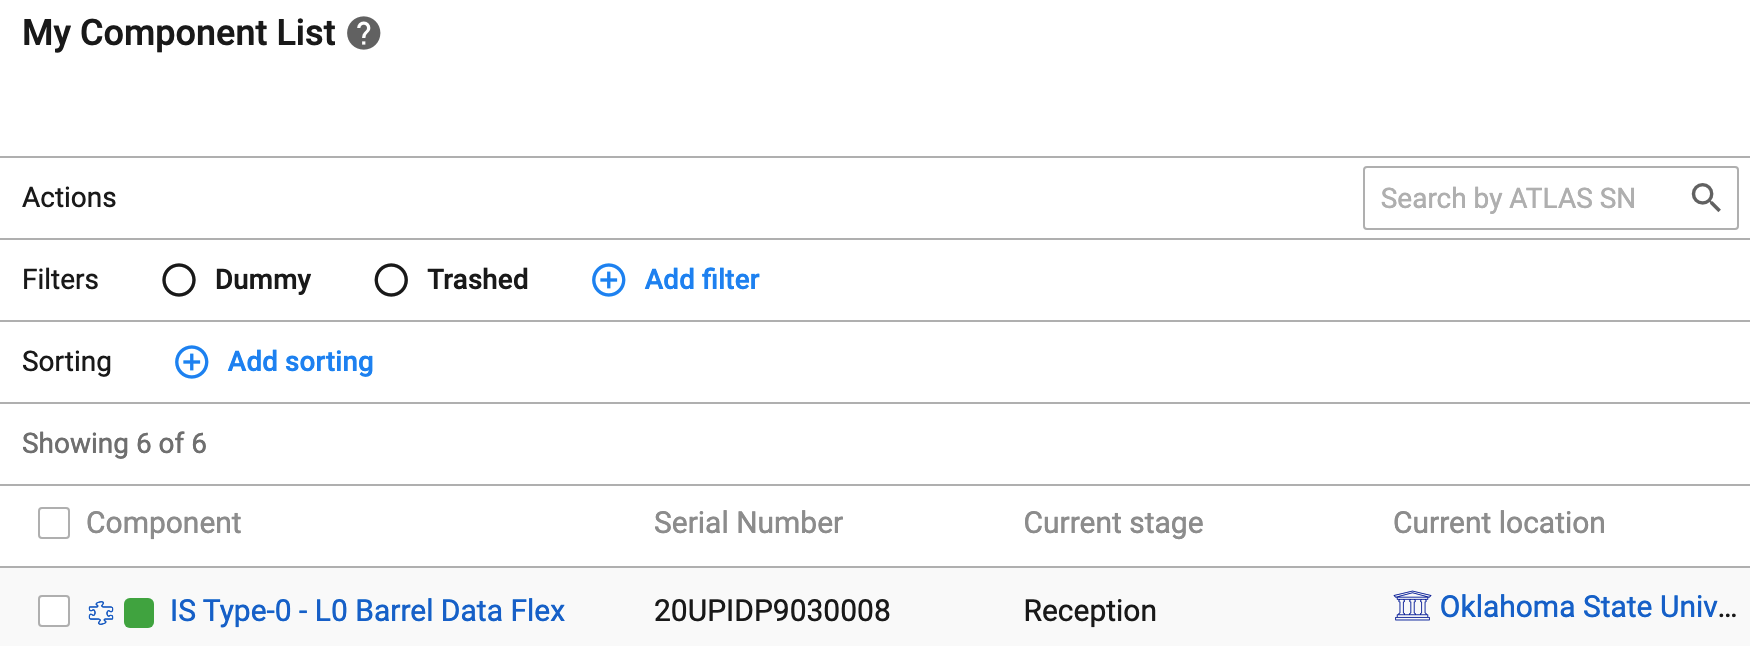

Once the component registration is complete, copy the generated ATLAS serial number for it will be used to register test results in the following scripts.



---




##Visual Inspection

To upload the visual inspection test results to the ITk database, run the script below. Sample inspection images are provided as arguments to upload as attachments to the test.

When the script is ran, paste the ATLAS serial number you that is linked to the component you want to register the test results for.

If the component passed the visual inspection test, say `yes` when prompted!
If not, you will be asked to type a reason or select a reason from a list of why the component **DOES NOT** pass the test.

You will be prompted if you're sure you want to post the results, type `yes` or `y`.



In [ ]:
!python visual_inspection.py sample_results/test_images_vi/*

Once the test is uploaded, you can see the results under the `Test Run List` as seen in the image.

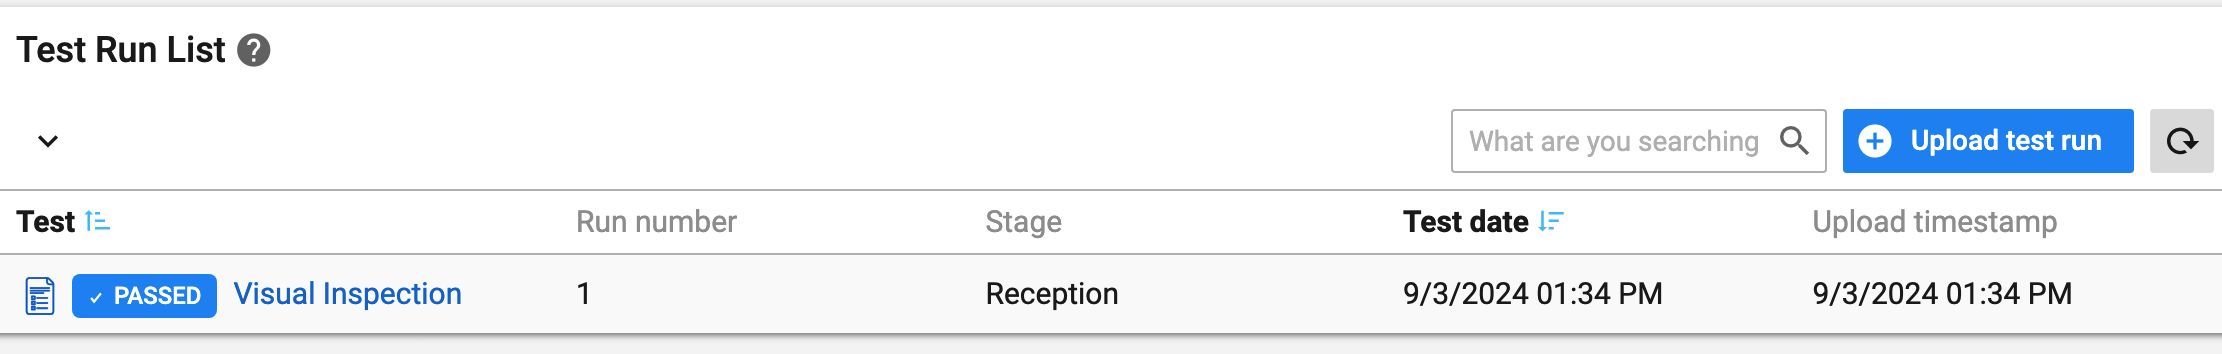

---

##Connectivity Test

The Connectivity Test uses the .`csv` output from the CIRRUS tester as an argument. This should be used regardless if the test passes or fails!

To upload the sample test results for the connectivity test, run the cell below.

Paste the serial number for the component you're uploading the results for when prompted!

In [ ]:
!python connectivity.py sample_results/test_results_connectivity/l1_barrel_example.csv

This test uploads the results and a few parameters from the `.csv` file. Most notabely, it uploads both tables `Error Details` and `Measured Values`. This test updates the testing stage for the component.

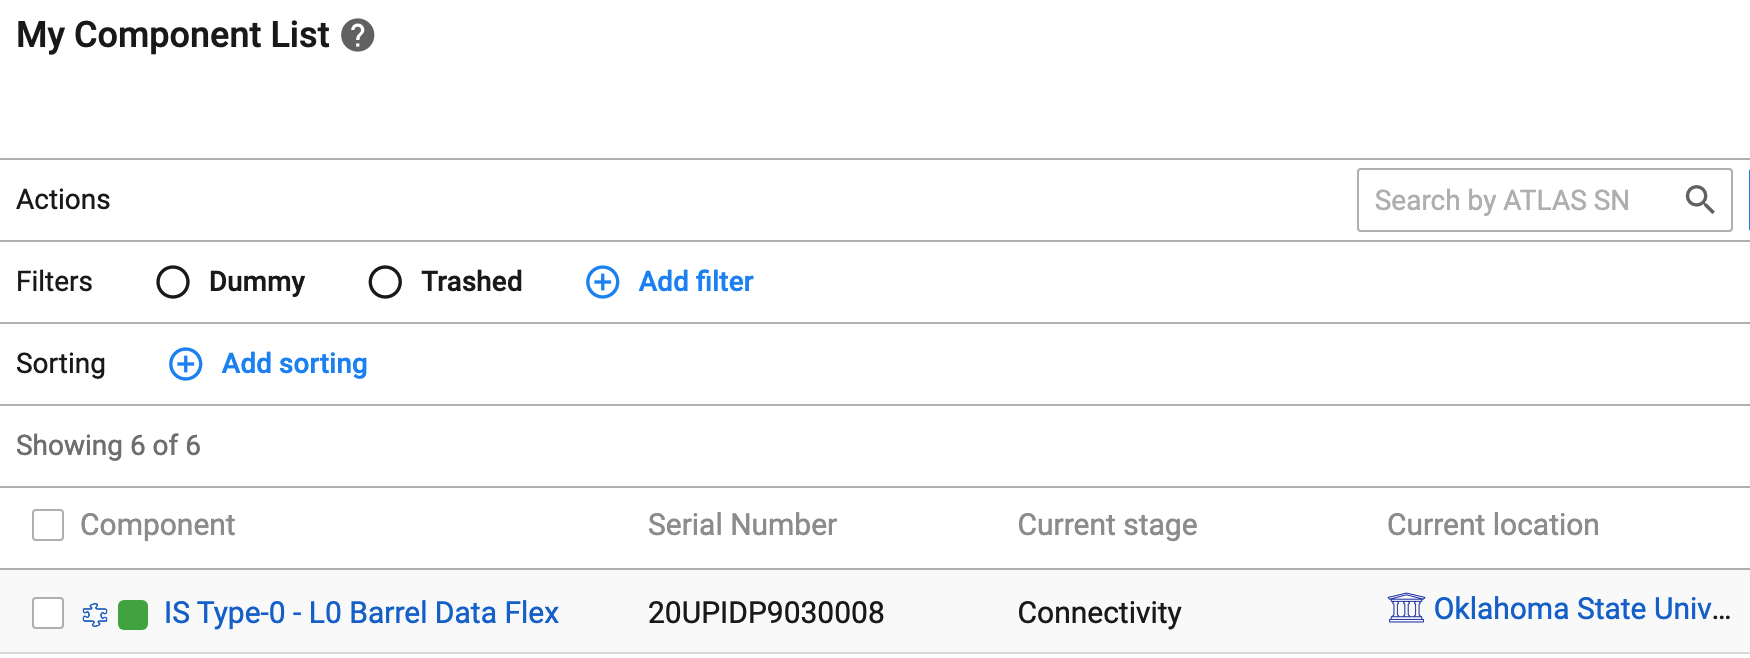

The Connectivity Test result now appears under `Test Run List`

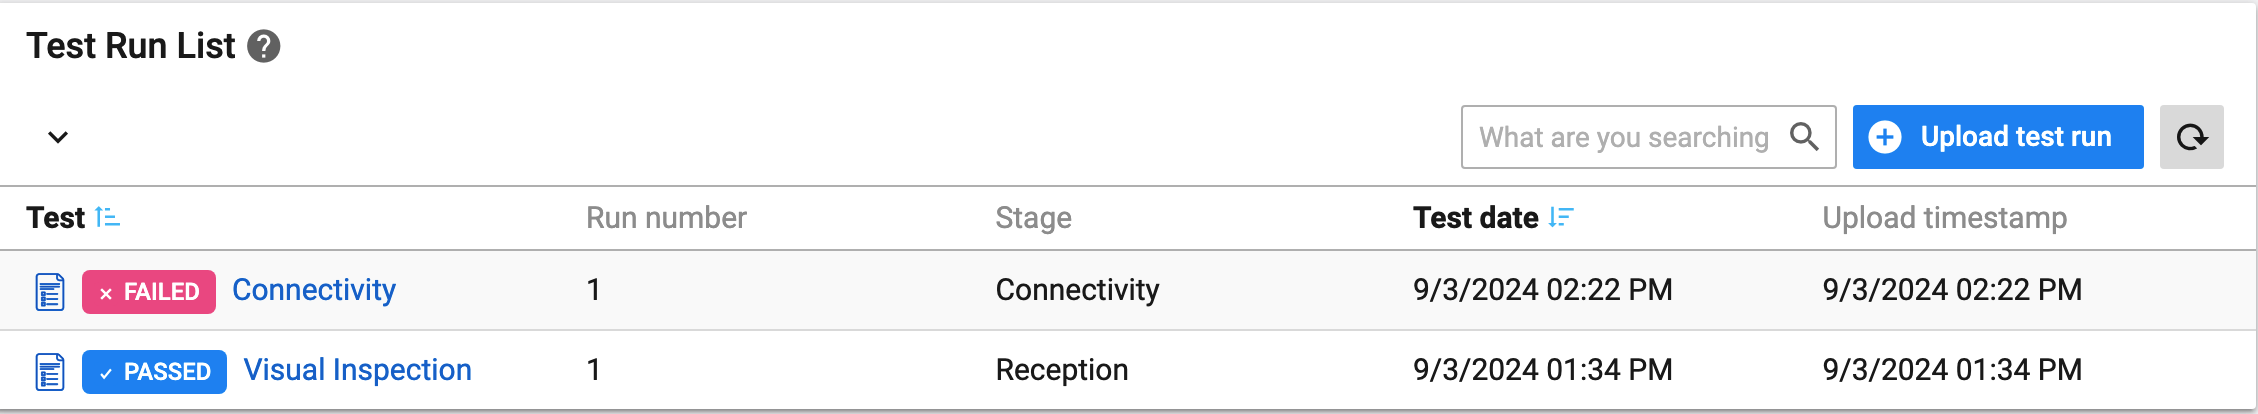

---

##Signal Integrity Test
To upload the test results, once again, run the cell below.

The Signal Integrity test produces many valuable parameters and images to give us insight. All of these results are added as attachments to the test and are contained with a single result folder. This folder is used as an argument for the script.

**More information on the data structure can be found in the GitHub's Readme found in [hardware_testing](https://github.com/OSU-HEP-HDL/hardware_testing)**

In [ ]:
!python signal_integrity.py sample_results/test_results_signal_integrity/*

This test updates the stage of the component, as seen:

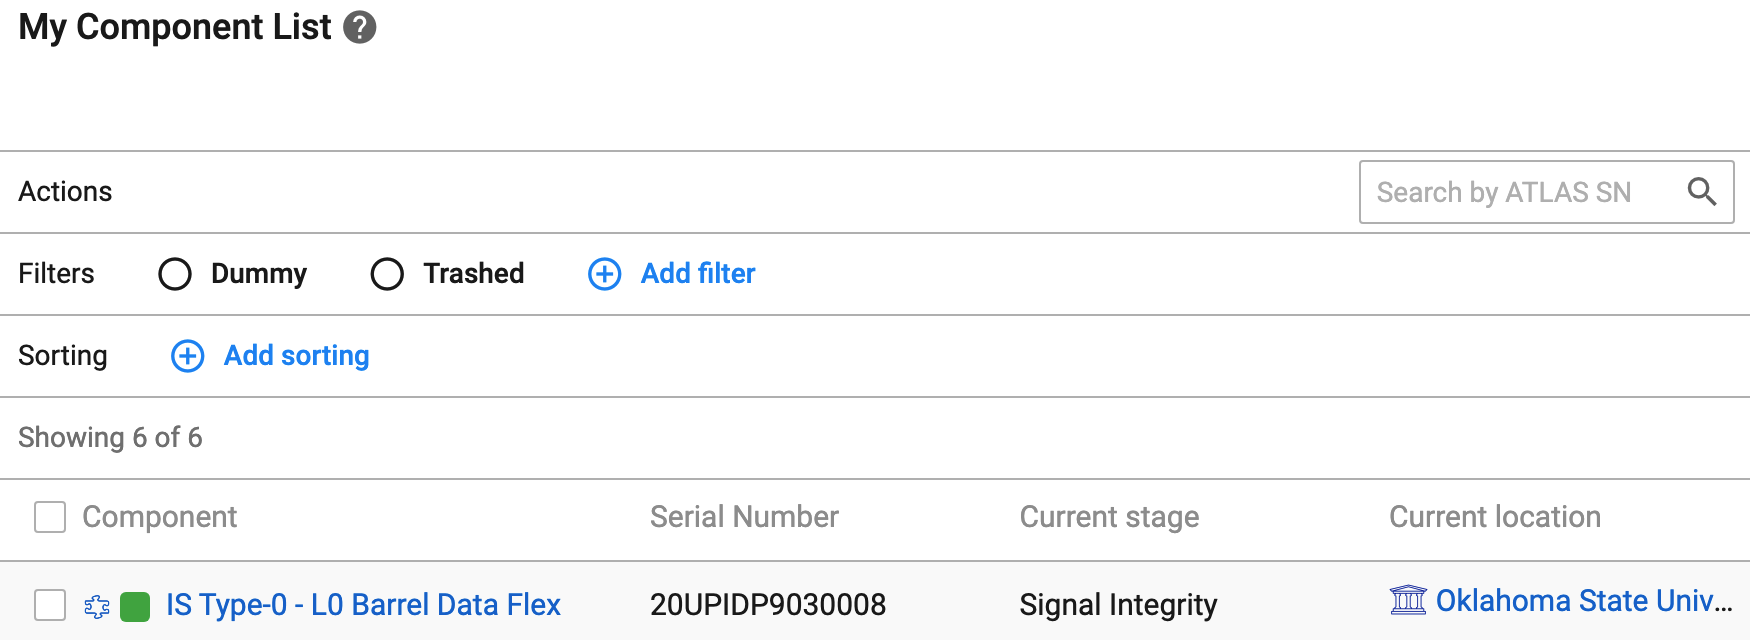

The results are also seen under the `Test Run List`

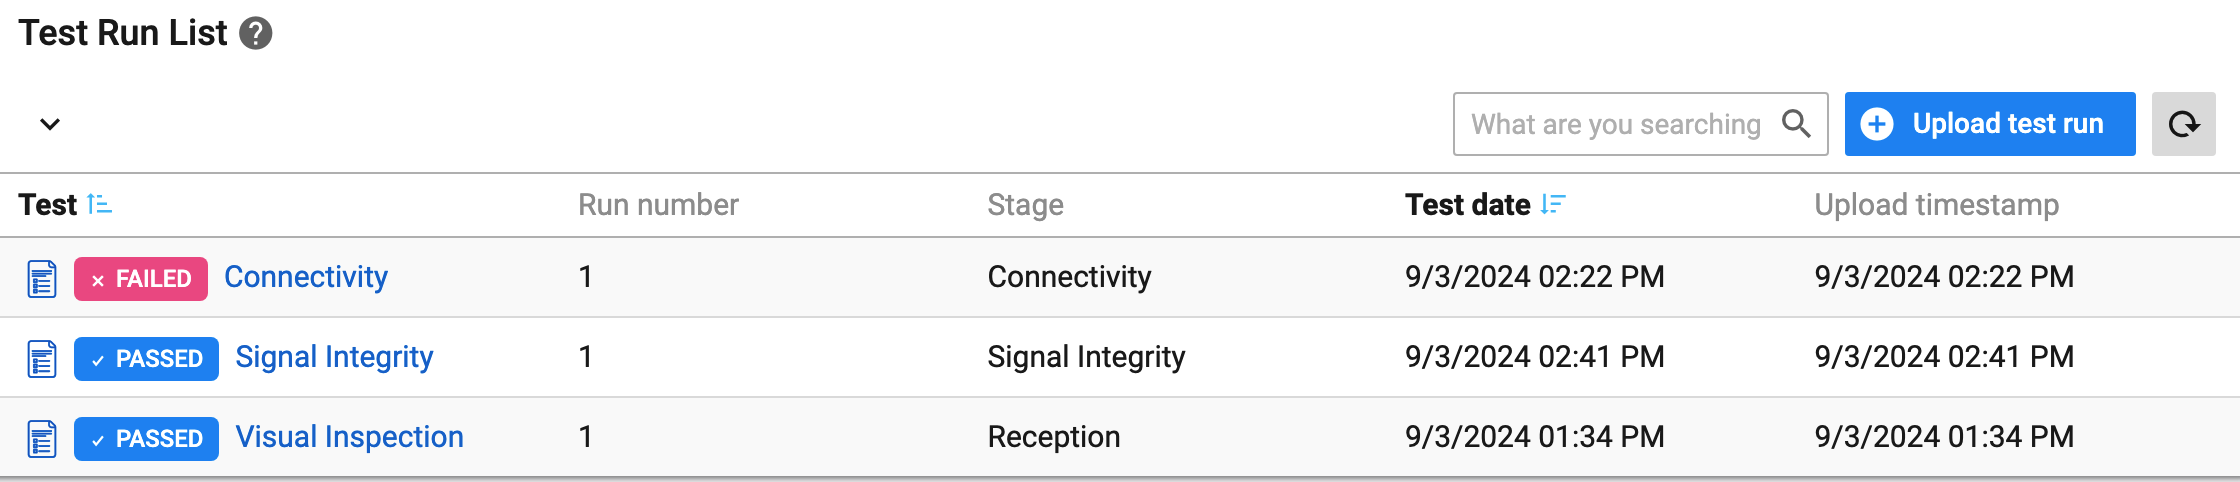

---

##Removing Components

Removing components is easy!

You can either go through the options that are given during the registration process or manually type it in. For the sake of ease, paste the serial number for the component you made in this tutorial.

You are asked for a reason of why this component is being deleted. Type `dummy`.

In [ ]:
!python remove_components.py

That's all! You've successfully registered a component, uploaded test results for all corresponding tests, and deleted your component!